# Programming Assignment 6

The goal of this assignment is to gain familiarity with Matplotlib by replicating some figures as closely as possible.

The assignment contains some cells that obtain data over the internet that you need to work with. Don't worry about how this code words. In the end, it will give you some numpy arrays, which you will use. 

***You may not use any packages other than Numpy and Matplotlib to complete this assignment.***

***You will need to review class lecture notebooks and read Matplotlib documentation to complete this assignment.*** Here are some useful resources

* [Matplotlib cheatsheets](https://matplotlib.org/cheatsheets/)
* [`subplots` reference](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
* [`contour`/`contourf` reference](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html)
* [`scatter` reference](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

## 1. Line plots

In this task, you will plot daily weather data from a NOAA Global Histoical Climatology Network daily (GHCNd) station in [Millbrook, NY](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:US1NYDT0008/detail). 

The next cell uses the Pandas package to read data from a web server. The data are then transferred to several Numpy arrays (`t_daily_min`, `t_daily_mean`, `t_daily_max`, etc.). You don't need to understand the how this process works. Just work with the Numpy arrays and recreate the following figure.  

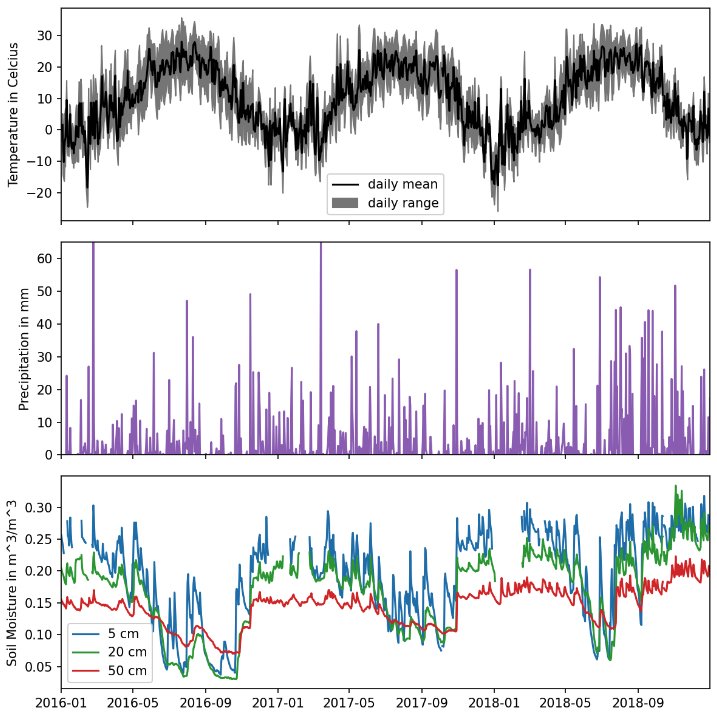

In [ ]:
# Do not modify this cell!

# Download data
import pandas as pd
try:
    import pooch
except ModuleNotFoundError:
    %conda install pooch
    import pooch

POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep=r'\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily = df.P_DAILY_CALC.values
soil_moisture_5cm = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10cm = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20cm = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50cm = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100cm = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [ ]:
# Write your code here

## 2. Contour plots

Next, visualize some recent global temperature data from the NCEP-NCAR atmospheric reanalysis. 

The data are read from a server using the Xarray package, but you don't need to know how that works. As in the previous task, you should work with the Numpy arrays named at the bottom of the following cell.

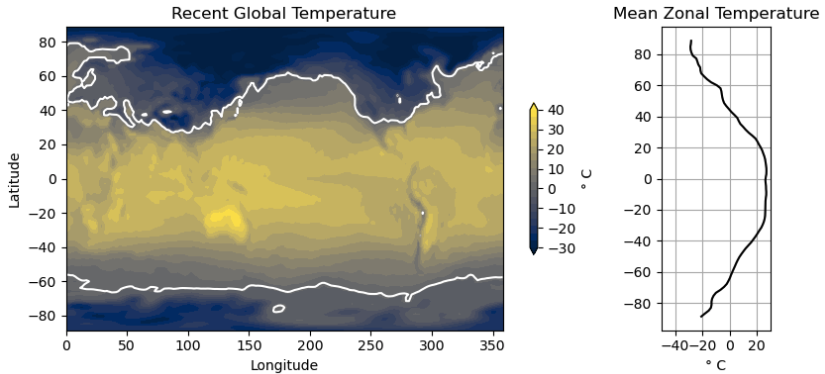

In [ ]:
# Do not modify this cell!

# Download data
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

In [ ]:
# Write your code here

## 3. Scatter plots

This task will map earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by log10(depth) and adjust the marker size to be magnitude<sup>4</sup>/100.

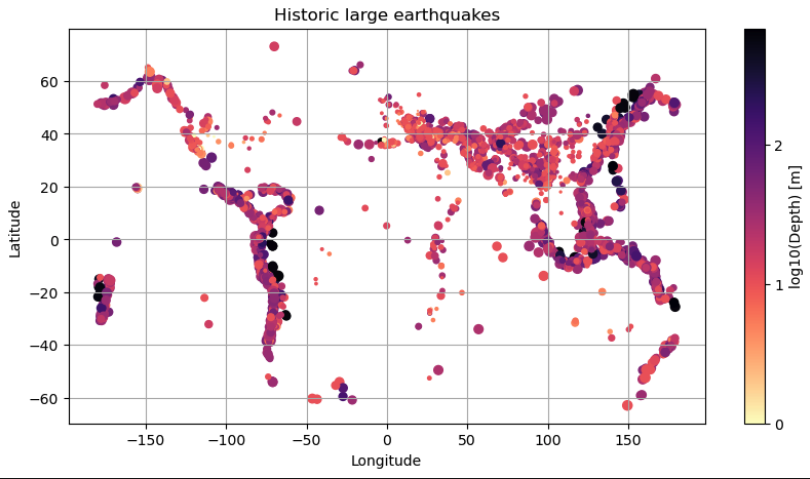

In [ ]:
import numpy as np
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

In [ ]:
# Write your code here